In [139]:
import ConBacktester as cb
import SMABacktester as sma
import MeanRevBacktester as mb
import MLBacktester as ml
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
df = pd.read_csv('AMZN.csv',parse_dates=['Date'],index_col=[0])
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000
2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000
2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000
2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000
2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000
...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600


Simple contrarian trading strategy

In [141]:
cb_backtest = cb.ConBacktester()

In [142]:
result = cb_backtest.test_strategy()
print('absolute performance of the strategy = {} -- out-/underperformance of strategy = {}'.format(result[0],result[1]))

absolute performance of the strategy = 0.263112 -- out-/underperformance of strategy = -2.859014


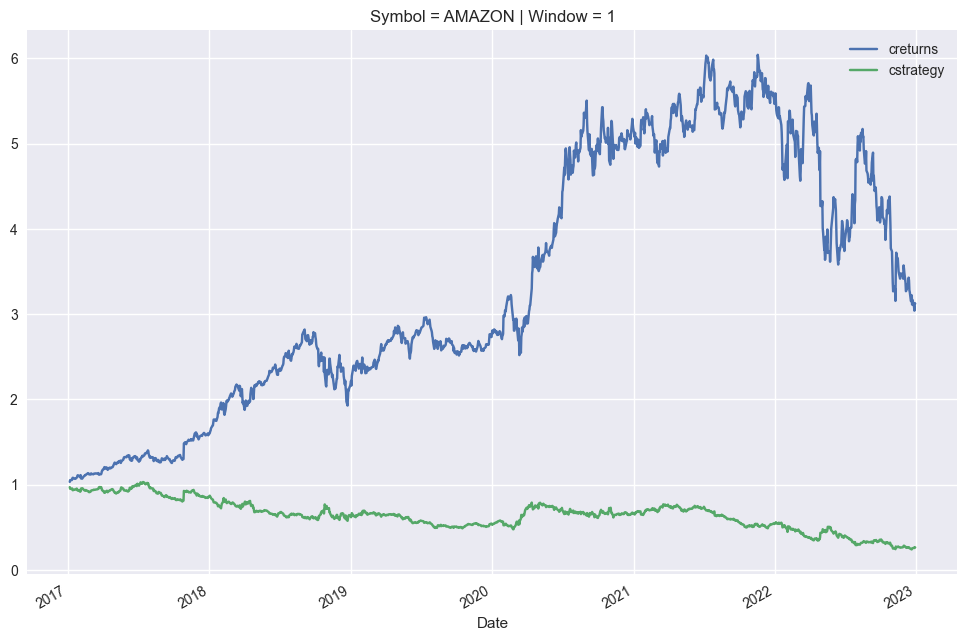

In [143]:
cb_backtest.plot_results()

absolute performance of the strategy = 1.636675 -- out-/underperformance of strategy = -1.31999


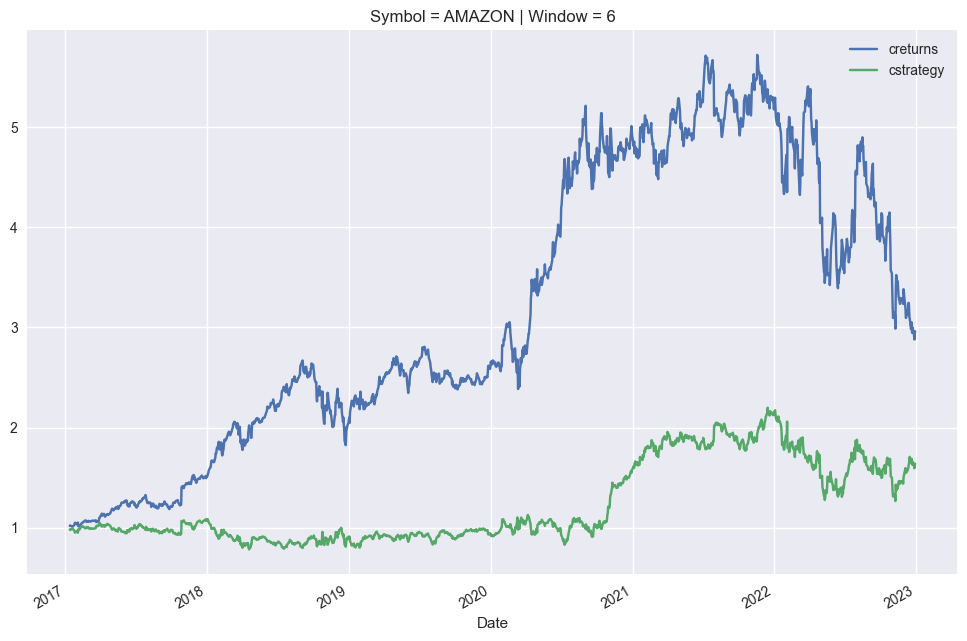

In [144]:
opt = cb_backtest.optimize_parameter(window_range=(1,20,1))
result = cb_backtest.test_strategy(window=opt[0])
print('absolute performance of the strategy = {} -- out-/underperformance of strategy = {}'.format(result[0],result[1]))
cb_backtest.plot_results()

SMA-based trading strategy

In [145]:
sma_backtest = sma.SMABacktester(SMA_S=5,SMA_L=20)

In [146]:
result = sma_backtest.test_strategy()
print('absolute performance of the strategy = {} -- out-/underperformance of strategy = {}'.format(result[0],result[1]))

absolute performance of the strategy = 1.139239 -- out-/underperformance of strategy = -1.697391


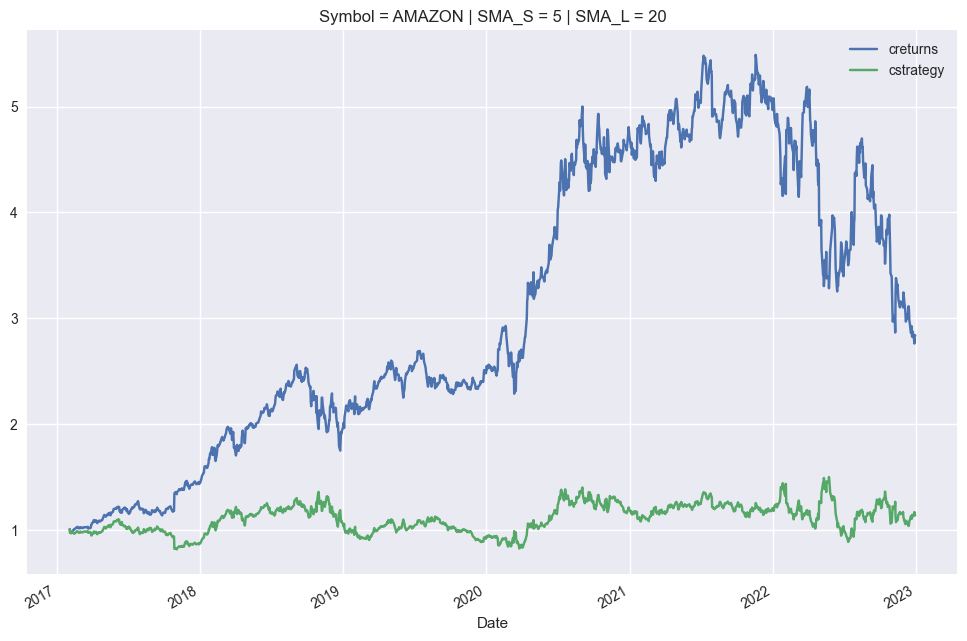

In [147]:
sma_backtest.plot_results()

absolute performance of the strategy = 4.577386 -- out-/underperformance of strategy = 2.155245


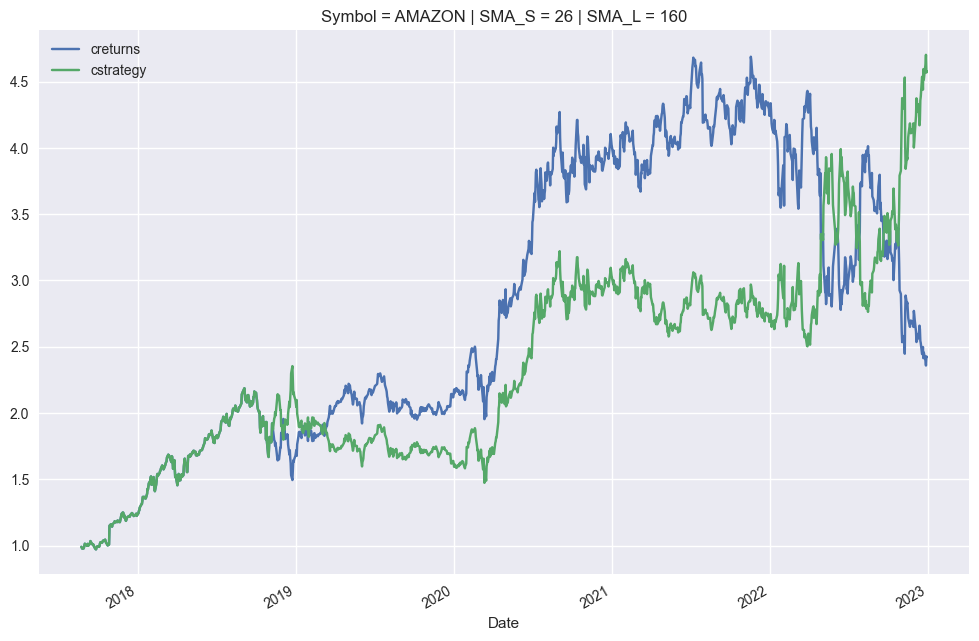

In [148]:
opt = sma_backtest.optimize_parameters(SMA_S_range=(20,40),SMA_L_range=(100,200))
sma_backtest = sma.SMABacktester(SMA_S=opt[0][0],SMA_L=opt[0][1])
result = sma_backtest.test_strategy()
print('absolute performance of the strategy = {} -- out-/underperformance of strategy = {}'.format(result[0],result[1]))
sma_backtest.plot_results()

Bollinger Bands-based trading strategy

In [149]:
bb_backtest = mb.MeanRevBacktester(SMA=10,dev=2)

In [150]:
result = bb_backtest.test_strategy()
print('absolute performance of the strategy = {} -- out-/underperformance of strategy = {}'.format(result[0],result[1]))

absolute performance of the strategy = 1.096305 -- out-/underperformance of strategy = -1.828739


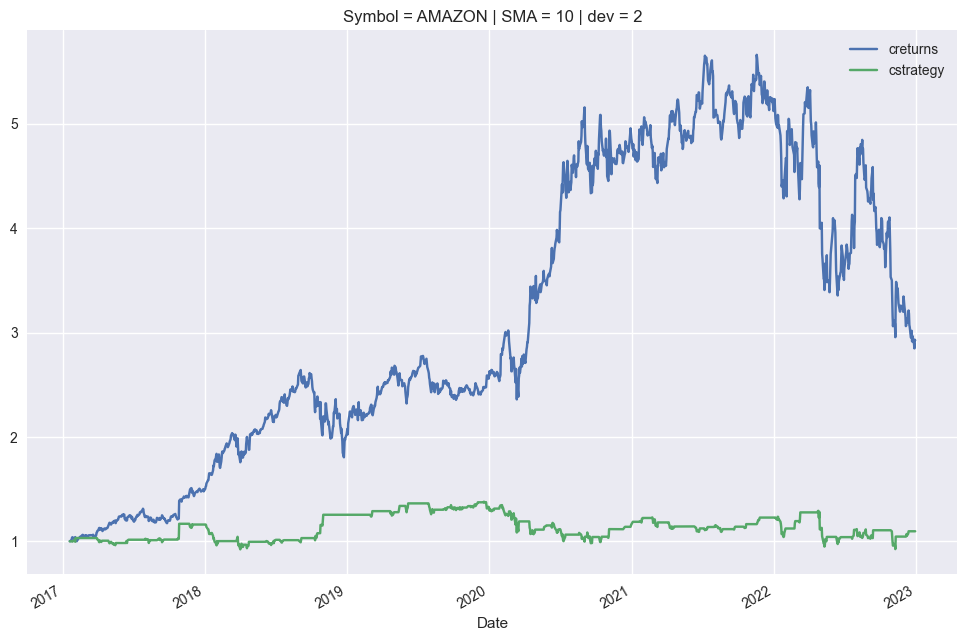

In [151]:
bb_backtest.plot_results()

absolute performance of the strategy = 1.101701 -- out-/underperformance of strategy = -1.770734


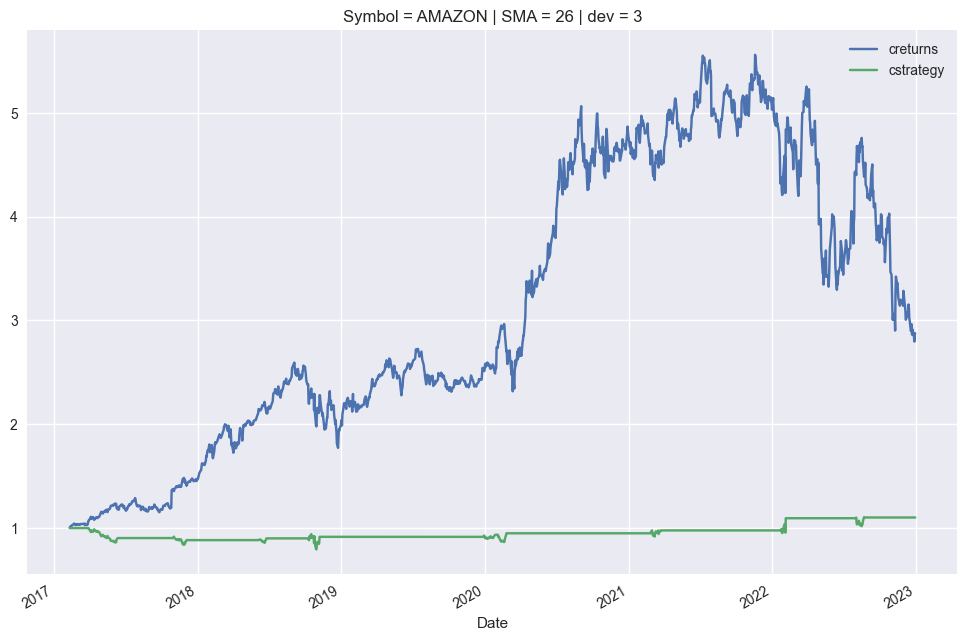

In [152]:
opt = bb_backtest.optimize_parameters(SMA_range=(25, 100, 1), dev_range=(1, 5, 1))
bb_backtest = mb.MeanRevBacktester(SMA=opt[0][0],dev=opt[0][1])
result = bb_backtest.test_strategy()
print('absolute performance of the strategy = {} -- out-/underperformance of strategy = {}'.format(result[0],result[1]))
bb_backtest.plot_results()

Machine Learning-based trading strategy (Classification)

In [153]:
ml_backtest = ml.MLBacktester()

In [154]:
result = ml_backtest.train_test_strategy(split_ratio=0.8,lags=20)
print('absolute performance of the strategy(train data) = {} -- out-/underperformance of strategy(train data) = {}'.format(result[0],result[1]))
print("-"*100)
print('absolute performance of the strategy(test data) = {} -- out-/underperformance of strategy(test data) = {}'.format(result[2],result[3]))
print("-"*100)

c:\Users\HAME\Desktop\Codes\GitHub\Backtesters\MLBacktester.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.feature_columns.append(col)
c:\Users\HAME\Desktop\Codes\GitHub\Backtesters\MLBacktester.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
c:\Users\HAME\Desktop\Codes\GitHub\Backtesters\MLBacktester.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

absolute performance of the strategy(train data) = 8.58619 -- out-/underperformance of strategy(train data) = 3.489097
----------------------------------------------------------------------------------------------------
absolute performance of the strategy(test data) = 0.627152 -- out-/underperformance of strategy(test data) = 0.087235
----------------------------------------------------------------------------------------------------


c:\Users\HAME\Desktop\Codes\GitHub\Backtesters\MLBacktester.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\HAME\Desktop\Codes\GitHub\Backtesters\MLBacktester.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # calculate Strategy Returns
c:\Users\HAME\Desktop\Codes\GitHub\Backtesters\MLBacktester.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

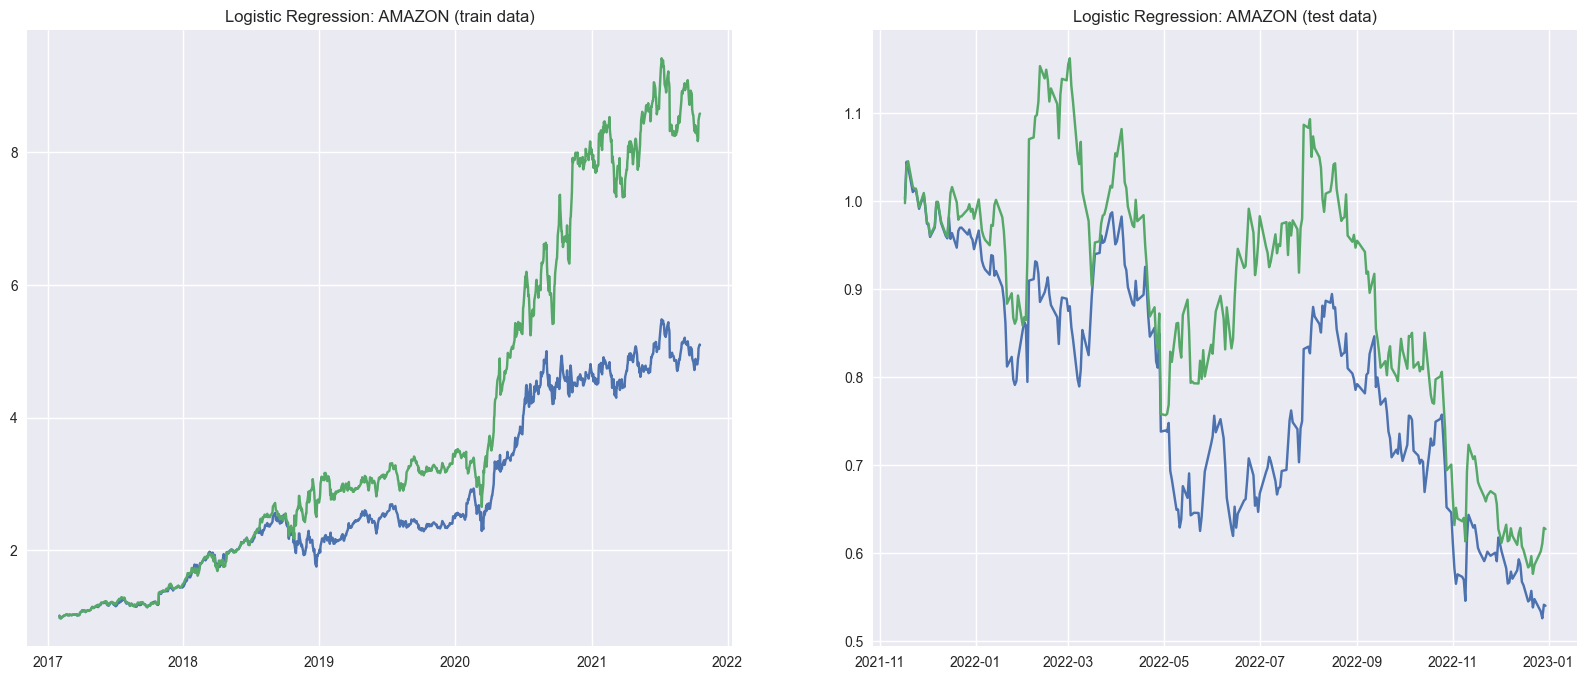

In [155]:
ml_backtest.plot_results()